# I Visualisation des données d'apprentissage sur le dataset Philippines
# méthode PCA :(Principal Component Analysis) à deux dimensions

In [1]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)

from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs


## 1. Chargement des données.

In [2]:
data = {}
data[0] = np.load('../data/phili2017/features/origin/ar.npy'),np.load('../data/phili2017/labels/labels_ar.npy')
data[1] = np.load('../data/phili2017/features/origin/si.npy'),np.load('../data/phili2017/labels/labels_si.npy')
data[2] = np.load('../data/phili2017/features/origin/vv.npy'),np.load('../data/phili2017/labels/labels_vv.npy')
data[3] = np.load('../data/phili2017/features/origin/sg.npy'),np.load('../data/phili2017/labels/labels_sg.npy')

## 2. Definition des traces d'apprentissages du système

In [3]:
LS = ['Processing', 'Perception', 'Input', 'Understanding']

In [4]:
Classes = {} #Style d'apprentissage
Classes[0] = ["Active","Reflective"]
Classes[1] = ["Sensitive","Intuitive"]
Classes[2] = ["Visual","Verbal"] 
Classes[3] = ["Sequential","Global"] 
FSLSM = ["A/R","S/I","V/V","S/G"]

## 3.Analyse de la distribution des variables

In [5]:
targets = {}
for i in range(0, len(data)):
    targets[i] = data[i][1]

### 3.1 Les classes sont elles équilibrées ?

In [7]:
for i in range(0, len(data)):
    nb1 = (targets[i]==1).sum()
    nb2 = (targets[i]==-1).sum()
    print ("Felder's Dimension: ",LS[i],"\t",Classes [i][0], ": ",nb1, "\n\t\t\t\t\t",Classes [i][1], ": ",nb2)

Felder's Dimension:  Processing 	 Active :  244 
					 Reflective :  263
Felder's Dimension:  Perception 	 Sensitive :  159 
					 Intuitive :  348
Felder's Dimension:  Input 	 Visual :  388 
					 Verbal :  119
Felder's Dimension:  Understanding 	 Sequential :  250 
					 Global :  257


### les classes ne sont pas équilibrées 

### 3.2 Reduction dimensionalité avec PCA

In [8]:
pca = PCA(n_components=2)
principalComponents = {}
def compute_pca(data):
    for i in range(0, len(data)):
        principalComponents[i] = pca.fit_transform(data[i][0])
        print(principalComponents[i].shape)
        print(pca.explained_variance_)

### Shape of each matrix Learning style dimension :

In [9]:
for i in range(0, len(data)):
    print(LS[i]," ",data[i][0].shape)

Processing   (507, 4)
Perception   (507, 4)
Input   (507, 4)
Understanding   (507, 2)


## 4. Application de l'ACP sur les donées de philippines

In [10]:
compute_pca(data)

(507, 2)
[133.20781817  47.77487496]
(507, 2)
[25.02745191 16.41358894]
(507, 2)
[133.41575823  74.8425608 ]
(507, 2)
[5.33226899 3.10193584]


## 5. Visualisation de la distribution des classes

In [11]:
def show_scatter(principalComponents,y,title,code):
    plt.rcParams["figure.figsize"] = (9, 8)
    plt.scatter(principalComponents[:,0],principalComponents[:,1])
    plt.title("PCA {} distribution".format(title))
    plt.xlabel("feature_pca_0 {}".format(code))
    plt.ylabel("feature_pca_1 {}".format(code))
    #plt.xlim(-2.3, 6.5)
    #plt.ylim(-2.3, 6.5)
    plt.axis('equal');
    #plt.show()
    #figure()
    plt.savefig('distribution-phili.png'.format(code))

In [12]:
def show_scatter_one_shot(principalComponents,title,code):
    X=principalComponents
    fig, axes = plt.subplots(1, len(data), figsize=(17, 3))
    for i, ax in zip(range(0,len(data)), axes):
        ax.scatter(X[i][:, 0], X[i][:, 1])
        ax.set_title("PCA {} distribution".format(title[i]))
        ax.set_xlabel("feature_pca_0 {}".format(code[i]))
        ax.set_ylabel("feature_pca_1 {}".format(code[i]))

#### Visualisation

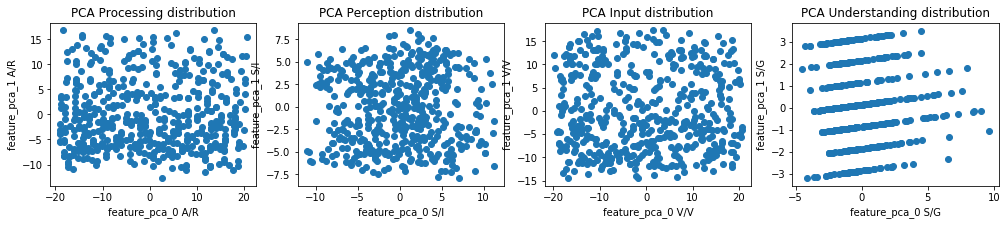

In [13]:
show_scatter_one_shot(principalComponents,LS,FSLSM)

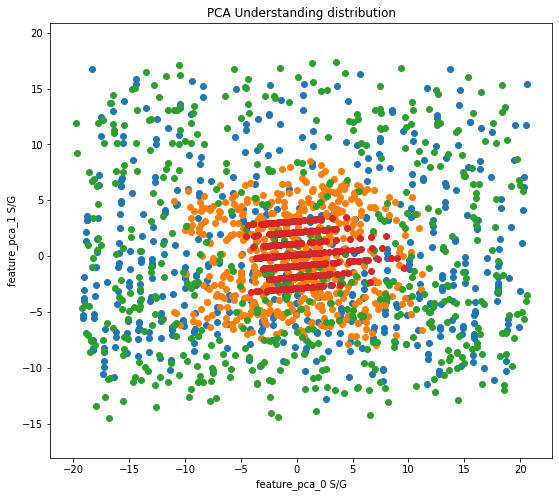

In [14]:
for i in range(0, len(LS)):
    show_scatter(principalComponents[i],data[i][1],LS[i],FSLSM[i])

In [15]:
def show_label_distribution(pos):
    i=pos
    labels = data[i][1]
    ind0 = np.where(labels==1)[0]
    ind1 = np.where(labels==-1)[0]
    mx = principalComponents[i]#np.vstack(principalComponents[0][:,1])
    print ('shape pca:',LS[pos]," Dimension : ",mx.shape)
    XPos = mx[ind0,:]
    XNeg = mx[ind1,:]
    #assert (XPos.shape == XNeg.shape)
    print ('shape',Classes[i][0], ' ' ,XPos.shape)
    print ('shape',Classes[i][1], ' ' ,XNeg.shape)
    plt.title("Label {} distribution".format(FSLSM[i]))
    plt.plot(XPos[:,0],XPos[:,1],'o')
    plt.plot(XNeg[:,0],XNeg[:,1],'*')
    plt.xlabel("feature_pca_0 {}".format(FSLSM[i]))
    plt.ylabel("feature_pca_1 {}".format(FSLSM[i]))

In [16]:
def show_label_distribution_one_shot(targets,principalComponents,code):
    X=principalComponents
    fig, axes = plt.subplots(1, len(data), figsize=(17, 3))
    for i, ax in zip(range(0,len(data)), axes):
        ax.set_title("Label {} distribution".format(code[i]))
        ax.set_xlabel("feature_pca_0 {}".format(code[i]))
        ax.set_ylabel("feature_pca_1 {}".format(code[i]))
        labels = targets[i]
        ind0 = np.where(labels==1)[0]
        ind1 = np.where(labels==-1)[0]
        mx = principalComponents[i]
        print ('shape pca: ',code[i]," ",mx.shape)
        XPos = mx[ind0,:]
        XNeg = mx[ind1,:]
        #assert XPos.shape == XNeg.shape, "The data should have same shape"
        print ('shape',Classes[i][0], ' ' ,XPos.shape)
        print ('shape',Classes[i][1], ' ' ,XNeg.shape)
        ax.plot(XPos[:,0],XPos[:,1],'o')


shape pca:  A/R   (507, 2)
shape Active   (244, 2)
shape Reflective   (263, 2)
shape pca:  S/I   (507, 2)
shape Sensitive   (159, 2)
shape Intuitive   (348, 2)
shape pca:  V/V   (507, 2)
shape Visual   (388, 2)
shape Verbal   (119, 2)
shape pca:  S/G   (507, 2)
shape Sequential   (250, 2)
shape Global   (257, 2)


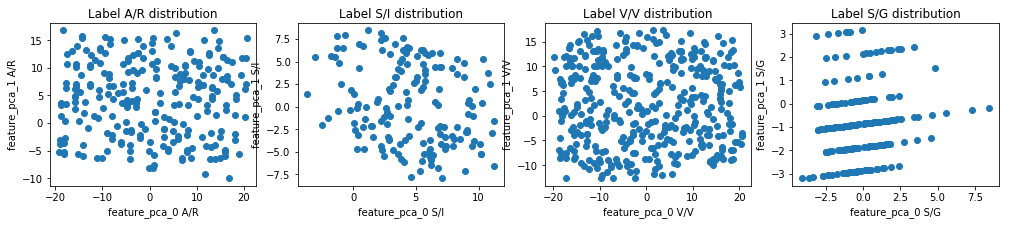

In [17]:
show_label_distribution_one_shot(targets,principalComponents,FSLSM)

shape pca: Understanding  Dimension :  (507, 2)
shape Sequential   (250, 2)
shape Global   (257, 2)


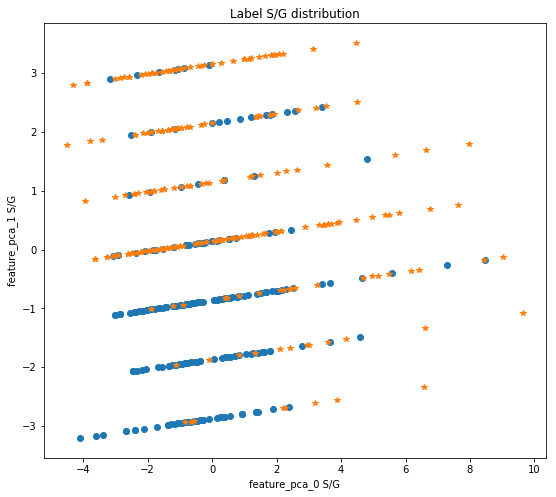

In [18]:
show_label_distribution(3)

shape pca: Input  Dimension :  (507, 2)
shape Visual   (388, 2)
shape Verbal   (119, 2)


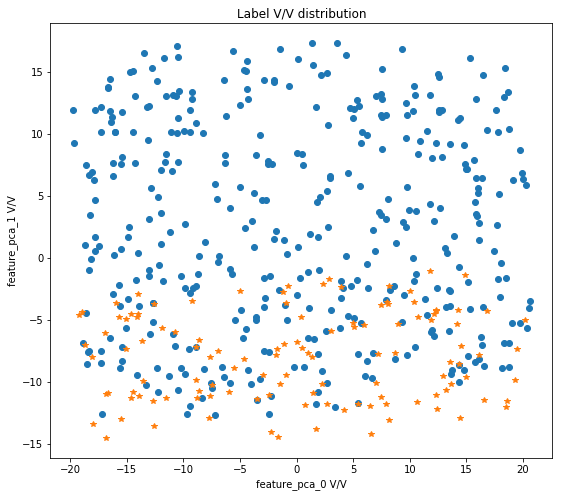

In [19]:
show_label_distribution(2)

shape pca: Perception  Dimension :  (507, 2)
shape Sensitive   (159, 2)
shape Intuitive   (348, 2)


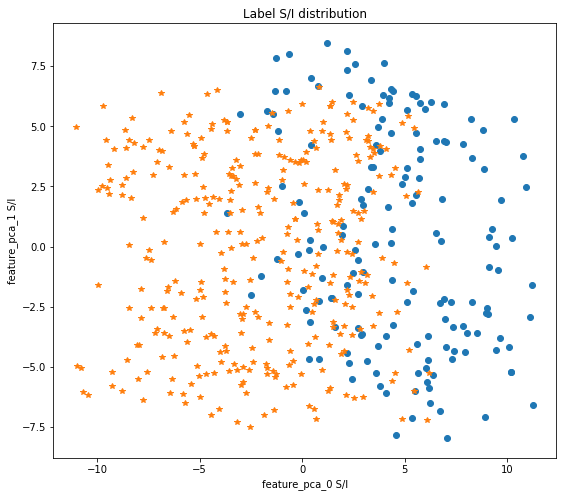

In [20]:
show_label_distribution(1)

shape pca: Processing  Dimension :  (507, 2)
shape Active   (244, 2)
shape Reflective   (263, 2)


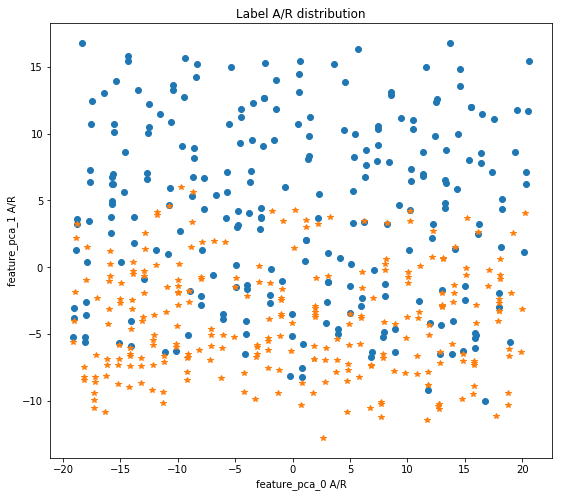

In [21]:
show_label_distribution(0)

In [22]:
# Pretest modeling  with Dummy Classifier 

In [23]:
data[0][0][0:2]

array([[ 1,  2,  8, 27],
       [11,  6,  3,  0]], dtype=int64)

### Variables selections with Lasso

In [ ]:
def lasso_variables(pos):
    pass

In [26]:
def normalize_features(feature_matrix):
    # Normalize the features
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms

    return(normalized_features,norms)

In [27]:
features_processing = ['forum_post','forum_view','self_assesment','text_materials']


In [29]:
X_processing,norm = normalize_features(data[0][0])
X_processing[0:2]

array([[0.00388444, 0.00884186, 0.09848065, 0.05414019],
       [0.04272884, 0.02652557, 0.03693025, 0.        ]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X_processing,data[0][1], test_size=0.2,random_state=0)   
print(np.shape(X_train))

(405, 4)


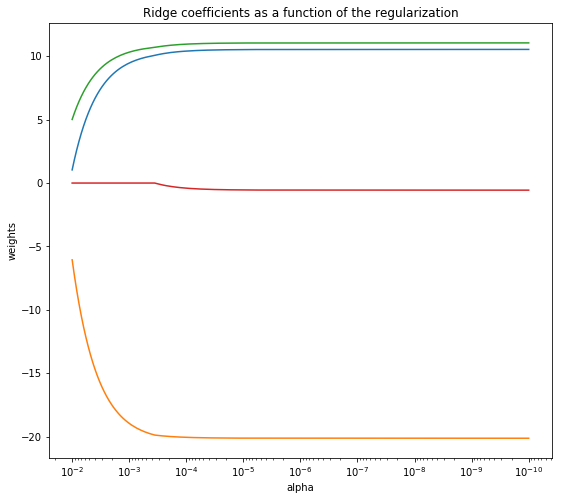

In [35]:
from sklearn import linear_model
# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
# #############################################################################
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()